Introduction to Linear Regression and Gradient Descent
------

In this notebook, we will review Linear Regression from the standpoint of Gradient Descent (instead of the normal equations), so as to build our intuition about how Gradient Descent works, and also introduce the concept of Stochastic Gradient Descent (SGD).

Let's first set up our notation for the problem:
$$
y = w\cdot x + b + \epsilon
$$
Or, if we consider $x = [1, x]$ then:
$$
y = \mathbf{w^T\cdot x} + \epsilon
$$

Coefficient: 42.38


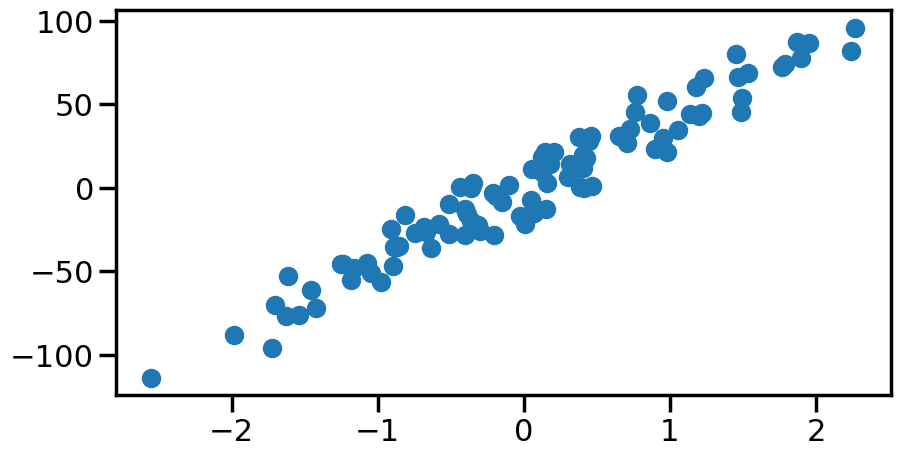

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
sns.set_context('poster')


n_samples = 100   # How many datapoints do we want?

X, y, coef = make_regression(n_samples=n_samples, # How many data?
                               n_features=1,    # How many dimensions?
                               n_informative=1, # How many dimensions matter?
                               noise=10,   # Add noise to the line
                               coef=True,  # Return the coefficients for us
                               random_state=0)  # Same random numbers every time

print("Coefficient: {:.5s}".format(str(coef)))
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.show()

From your earlier statistics classes, you likely learned how to solve for the linear regression weights using the [Normal Equations](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Derivation_of_the_normal_equations):
$$
\hat{w} = (X^T X)^{-1}X^T y
$$

In [2]:
X = np.matrix(X)
y = np.matrix(y).T
wn = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
wn = wn[0,0]
print(wn)

42.57166255883968


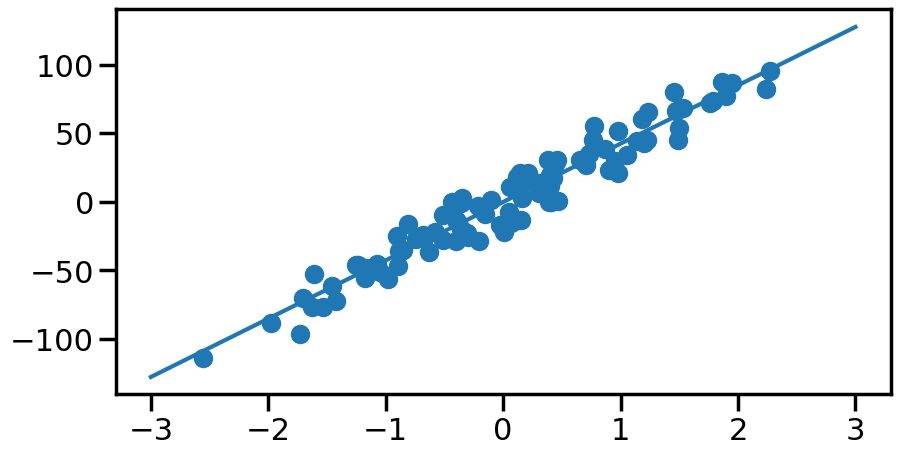

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(np.asarray(X).ravel(),np.asarray(y).ravel())
plt.plot([-3,3],[-3*wn, 3*wn])
plt.show()

There are ways of solving the normal equations directly without needing to take the inverse (such as using the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)), however today we are going to focus on a different kind of solver that has more broader applications: [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) and it's cousin [Stochastic Gradient Descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

We first need to start with some sort of Cost function that we wish to minimize. In general, we will consider costs of the form:
$$
Loss = Error + \alpha\cdot Penalty
$$

Specifically for Linear Models, we will talk about costs (which I'll call $J$) of the form:

$$
J(w,X) = \frac{1}{N}\Sigma_{i=1}^N \left(\mathbf{y}_i - f(\mathbf{w},\mathbf{x}_i)\right)^2 + \alpha\cdot\Omega(\mathbf{w})
$$

where for Linear Models $f(w,X) = \mathbf{w\cdot X}$, so that our overall cost becomes:

$$
J(w,X) = \frac{1}{N}\Sigma_{i=1}^N \left(\mathbf{y}_i - \mathbf{w\cdot \mathbf{x}_i}\right)^2 + \alpha\cdot\Omega(\mathbf{w})
$$

We'll consider the no-penalty case ($\alpha=0$), so that our loss is just:

$$
J(w,X) = \frac{1}{N}\Sigma_{i=1}^N \left(\mathbf{y}_i - \mathbf{w\cdot \mathbf{x}_i}\right)^2
$$

Let's plot this cost as a function of the line slope, just to get an idea of what it looks like:

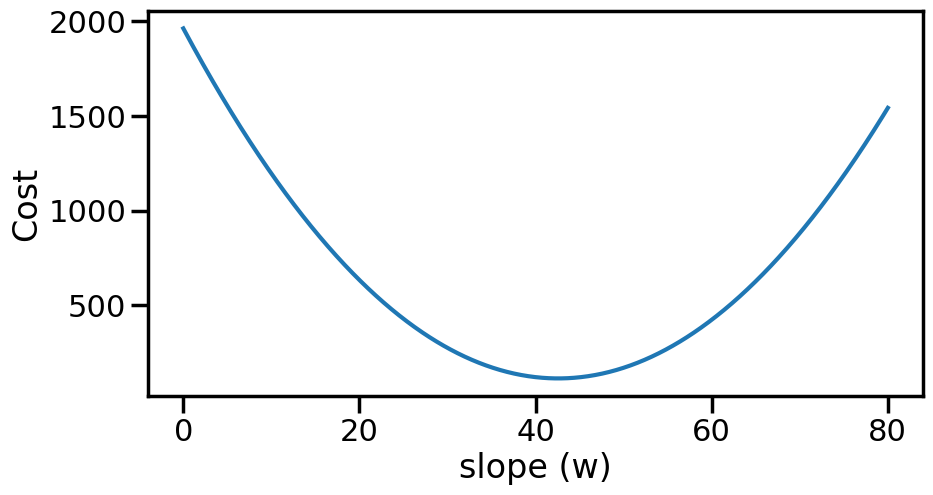

In [4]:
def loss(w):
    N = len(y)
    return np.sum(np.square(y-w*X))/N

wp = np.linspace(0,80,1000)
cost = [loss(w) for w in wp]
plt.figure(figsize=(10,5))
plt.plot(wp,cost)
plt.ylabel('Cost')
plt.xlabel('slope (w)')
plt.show()

While it might seem clear to us, visually, where the lowest cost is, actually finding this point automatically via a computer with minimal effort is another story. This is essentially what the field of Optimization tries to do. One simple (but powerful) method of optimization is Gradient Descent. It works by taking a (possibly random) starting point (e.g., w=60), and then computing the gradient of the function at that point. Since gradients will point upwards, and we want to minimize the cost, we will instead walk in the *negative* gradient direction, which should move us closer to the bottom. Let's see this on an example, by computing the gradient of our cost function above with respect to the slope (w):

$$
\begin{aligned}
\frac{\partial J}{\partial w} &=& \frac{\partial}{\partial w} \left( \frac{1}{N}\Sigma_{i=1}^N \left(\mathbf{y}_i - \mathbf{w}\cdot \mathbf{x}_i\right)^2 \right) \\
&=&\frac{1}{N}\Sigma_{i=1}^N  \frac{\partial}{\partial w} \left(\left(\mathbf{y}_i - \mathbf{w}\cdot \mathbf{x}_i\right)^2 \right) \\
&=&\frac{2}{N}\Sigma_{i=1}^N (\mathbf{y}_i - \mathbf{w}\cdot \mathbf{x}_i) \frac{\partial}{\partial w} \left(\mathbf{y}_i - \mathbf{w}\cdot \mathbf{x}_i \right) \\
&=&-\frac{2}{N}\Sigma_{i=1}^N (\mathbf{y}_i - \mathbf{w}\cdot \mathbf{x}_i) \cdot \mathbf{x}_i 
\end{aligned}
$$

Let's plot this:

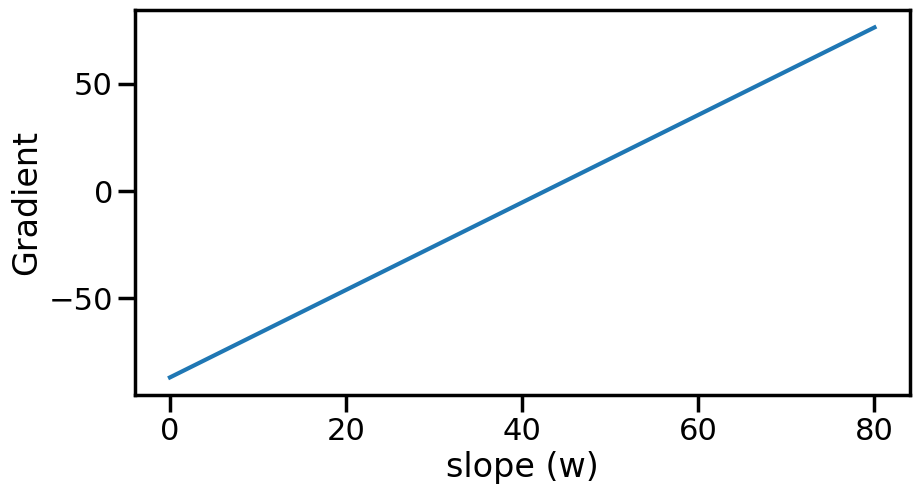

In [5]:
def dloss(w,X):
    N = len(y)
    return -2*np.sum(np.multiply(y-w*X,X))/N

grad = [dloss(w,X) for w in wp]
plt.figure(figsize=(10,5))
plt.plot(wp,grad)
plt.ylabel('Gradient')
plt.xlabel('slope (w)')
plt.show()

Once we have 1) a starting point, and 2) the gradient at a point, the idea with gradient descent is to take a small step ($\alpha$) in the direction of the negative gradient:

$$
w_{t+1} = w_t - \alpha \frac{\partial J}{\partial w}
$$

Note: here we are just considering a single parameter (the slope, w), but this method extends to multiple parameters ($\mathbf{\theta}$), via the gradient operator:

$$
\mathbf{\theta}_{t+1} = \mathbf{\theta}_t - \alpha \nabla_\theta J
$$

In [6]:
def grad_step(w, X, alpha):
    return w - alpha*dloss(w,X)

In [7]:
wg = 42  # Start at 50
wg = grad_step(wg, X, 0.1)  # Take a small step
print(wg)  # Now we are at...

42.11655097614407


## Experiment: 
Try modifying the initial guess `wg` and the step size `alpha` and re-running the below cells. What do you observe?

In [8]:
######################
# Try changing the below
wg = 80 # Initial guess at slope; Try changing this
alpha = 0.1  # Try changing alpha (both big and small)
# What do you notice?
###########################


In [9]:

num_steps = 20 # Take 20 steps
weights = np.zeros(num_steps)
weights[0] = wg  # Set the initial weight
for i in range(1,num_steps): 
    weights[i] = grad_step(weights[i-1], X, alpha)
print("Final weight from Gradient Descent is {:.2f}".format(weights[i]))
print("Compared to {:.2f} from the Normal Equations".format(wn))

Final weight from Gradient Descent is 43.06
Compared to 42.57 from the Normal Equations


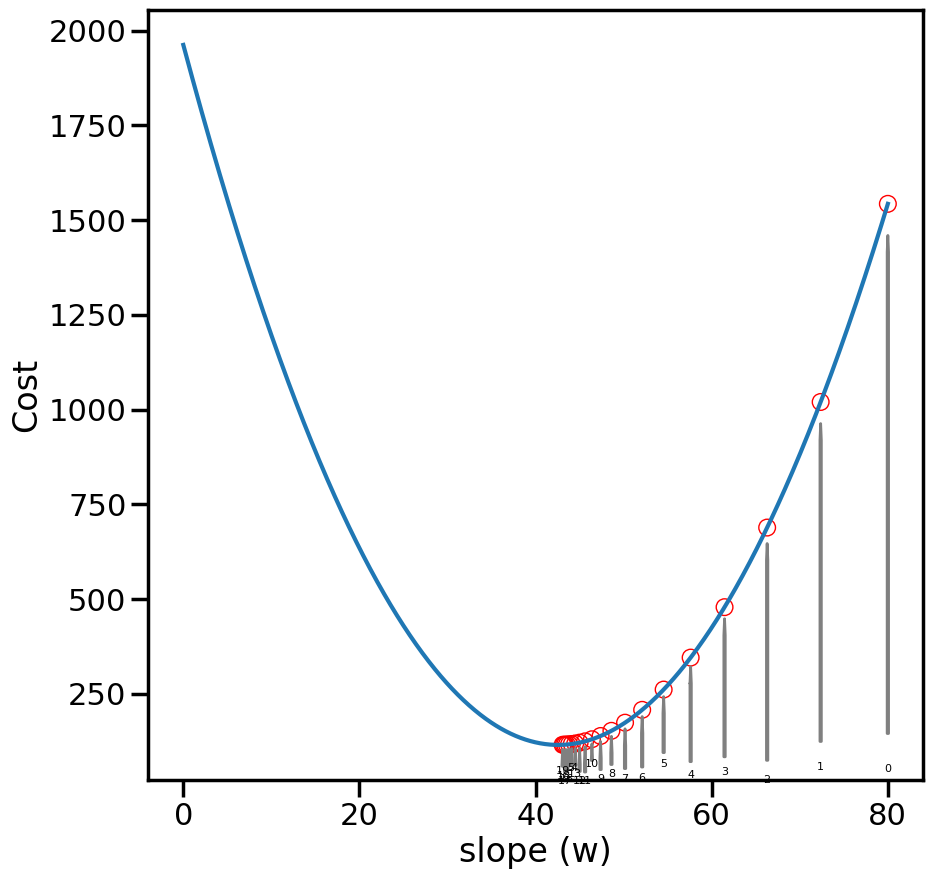

In [10]:
weight_cost = [loss(w) for w in weights]
plt.figure(figsize=(10,10))
plt.plot(wp,cost)
plt.scatter(weights,weight_cost,facecolors='none', edgecolors='r',linewidth=1)
ax = plt.gca()
for i,w in enumerate(weights):
    ax.annotate('{}'.format(i), xy=(w, weight_cost[i]-10), 
                xytext=(w+1e-8, 10+50*np.random.rand()),
                ha='center',fontsize=8,
                arrowprops=dict(facecolor='white', edgecolor='grey',
                                shrink=0.05,
                            width=1, headwidth=1)
               )
plt.ylabel('Cost')
plt.xlabel('slope (w)')
plt.show()

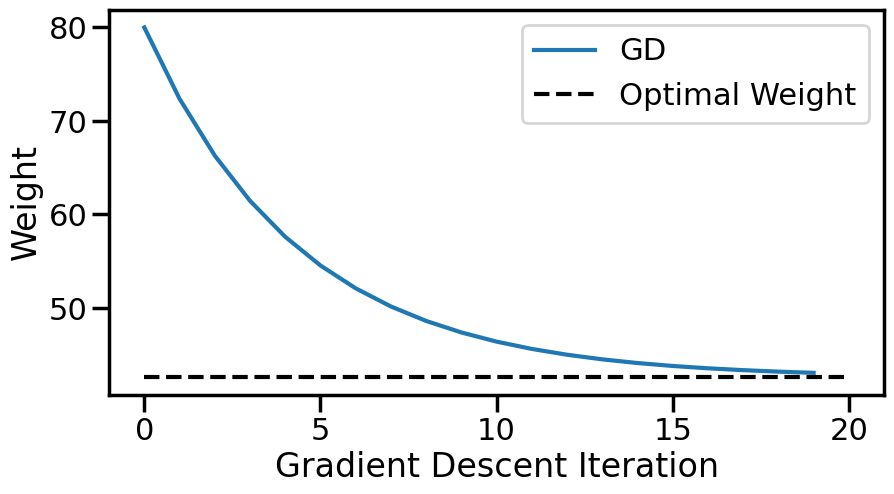

In [11]:
# Plot how the weights progress
plt.figure(figsize=(10,5))
plt.plot(range(len(weights)),weights, label='GD')
plt.hlines(wn, 0, len(weights), 
           label = "Optimal Weight", 
           color='k', linestyle="--")
plt.xlabel('Gradient Descent Iteration')
plt.ylabel('Weight')
plt.legend()
plt.show()
# Copying for comparison later
gd_weights = weights

# Stochastic Gradient Descent
To perform Gradient Descent, we needed to sum the gradients across all data points (to compute $\nabla J$). We may not want to do this, for many reasons: 1) we may not be able to iterate through all the data points easily (maybe the data are split across many computers or files), 2) we may not want to store the data at all after we are done with it (online learning), 3) maybe computing the gradient for one data point is difficult, and we would like to make forward progress on the model while computing gradients of other points, *etc.*

This is where *Stochastic* Gradient Descent comes it. Rather than Gradient Descent, which computes the gradient over all the data ($\mathbf{X}$):
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \alpha \frac{\partial J(\mathbf{w},\mathbf{X})}{\partial \mathbf{w}}
$$

Stochastic Gradient Descent computes a similar quantity, but only over one data point ($\mathbf{x}_i$) at a time (or a small batch of data if that is feasible):
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \alpha \frac{\partial J(\mathbf{w},\mathbf{x}_i)}{\partial \mathbf{w}}
$$


In [12]:
def sgd_dloss(w,y,x):
    return float(-2*(y-w*x)*x)

In [13]:
#################################
# Try Changing the below
wg = 80 # Initial guess at slope
alpha = 0.05  # Step Size
num_passes = 40  # Number of times we pass through the data
shuffle_after_pass = False  # Whether to shuffle the data
##########################
# What do you find?

N = len(y)
weights = np.zeros(N*num_passes+1)
k=0
weights[k] = wg  # Set the initial weight
print('Initial weight: ',weights[0])

index = list(range(N))
for n in range(num_passes):
    if shuffle_after_pass:
        np.random.shuffle(index)
    for i in index:
        k+=1
        xi = X[i,0]
        yi = y[i]
        weights[k] = weights[k-1] - alpha*sgd_dloss(weights[k-1],yi,xi)
print('Final Weight from SGD: {:.2f}'.format(weights[-1]))
print("Compared to {:.2f} (Normal Equations)".format(wn))

Initial weight:  80.0
Final Weight from SGD: 39.27
Compared to 42.57 (Normal Equations)


C:\Users\mafuge\AppData\Local\Temp\ipykernel_29488\3561310644.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-2*(y-w*x)*x)


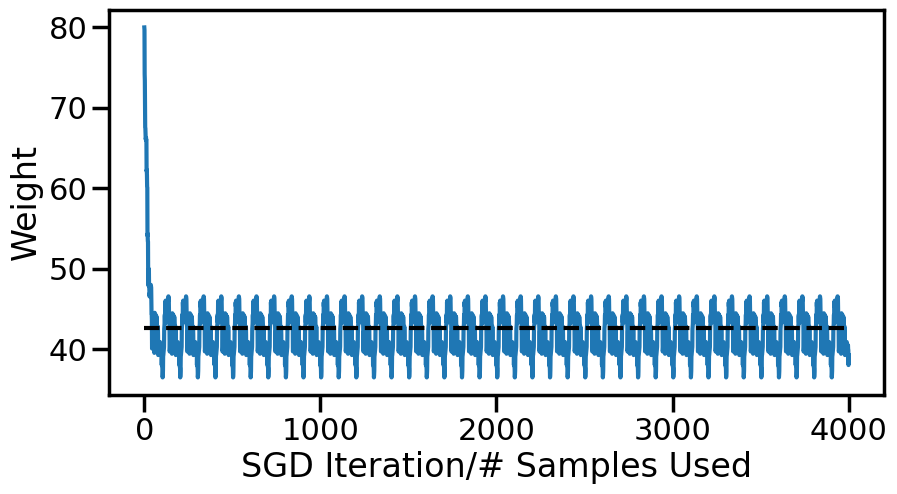

In [14]:
plt.figure(figsize=(10,5))
plt.plot(range(len(weights)),weights)
plt.hlines(wn, 0, len(weights), 
           label = "Optimal Weight", 
           color='k', linestyle="--")
plt.xlabel('SGD Iteration/# Samples Used')
plt.ylabel('Weight')
plt.show()

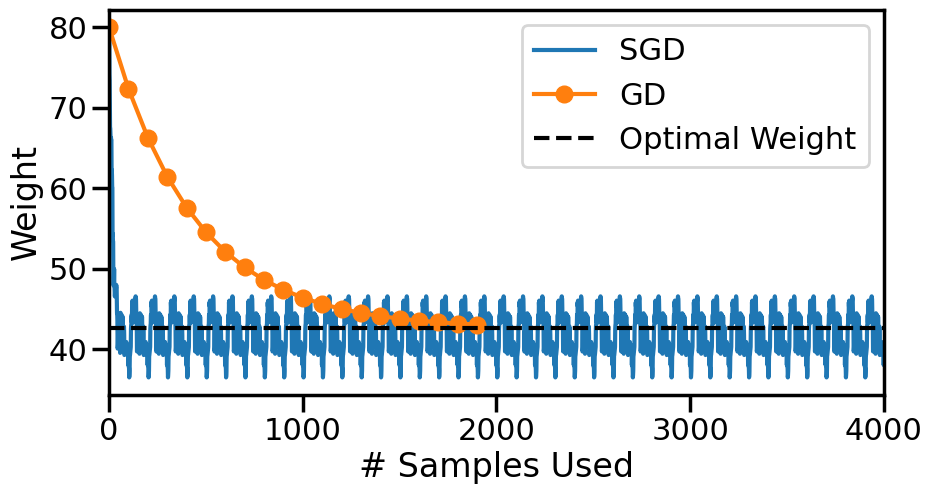

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(len(weights)), weights,
         label = 'SGD')
plt.plot(np.array(range(len(gd_weights)))*len(index),
         gd_weights,
         marker='o',
         label = 'GD')
plt.hlines(wn, 0, len(weights), 
           label = "Optimal Weight", 
           color='k', linestyle="--")
plt.xlabel('# Samples Used')
plt.ylabel('Weight')
#plt.ylim([30,55])
plt.xlim([0,len(weights)])
plt.legend()
plt.show()

## Experiment:
What do you notice about the behavior of SGD? What happens when alpha is small vs large? What happens when you take multiple passes through the data? If I keep  doing more passes, do I eventually converge?



What you are seeing is a result of [Stochastic Approximation](https://en.wikipedia.org/wiki/Stochastic_approximation) (trying to approximate a gradient of a function using noisy estimates of that gradient (where the noise here comes from evaluating the gradient using only one data point).

This behavior was studied by multiple people in the 1950s and 60s, with one key result coming Herbert Robbins and Sutton Monro, in what is now called the [Robbins-Monro Algorithm](https://en.wikipedia.org/wiki/Stochastic_approximation#Robbins.E2.80.93Monro_algorithm). The central idea is rather than defining a *single* step size, we should let the step size decrease over time. Initially, we need to move the weights a lot, but as we get closer to the goal, they exert less influence so that we *settle* at some point. What they showed was that SGD would converge to the right estimator so long as the sequence satisfies the following properties:


$$
\begin{aligned}
\sum_{n=1}^{\infty} a_n &= \infty \\
\sum_{n=1}^{\infty} a_n^2 &< \infty
\end{aligned}
$$

For sequences where $a_n>0~\forall~n>0$, Robbins and Monro recommended the $a_n = a/n$, however this rate is based on some assumptions about smoothness and convexity which sometimes don't work well in practice. People generally use decay rates on the order of $O(1/\sqrt(n))$,  however there are entire fields of researchers working on this "optimal step size" problem for SGD and there are many great alternative procedures out there if you know certain things about the function (e.g., can compute things like hessians, etc.) 

Initial weight:  80.0
Final Weight from SGD: 44.06
Compared to 42.57 (Normal Equations)


C:\Users\mafuge\AppData\Local\Temp\ipykernel_29488\3561310644.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-2*(y-w*x)*x)


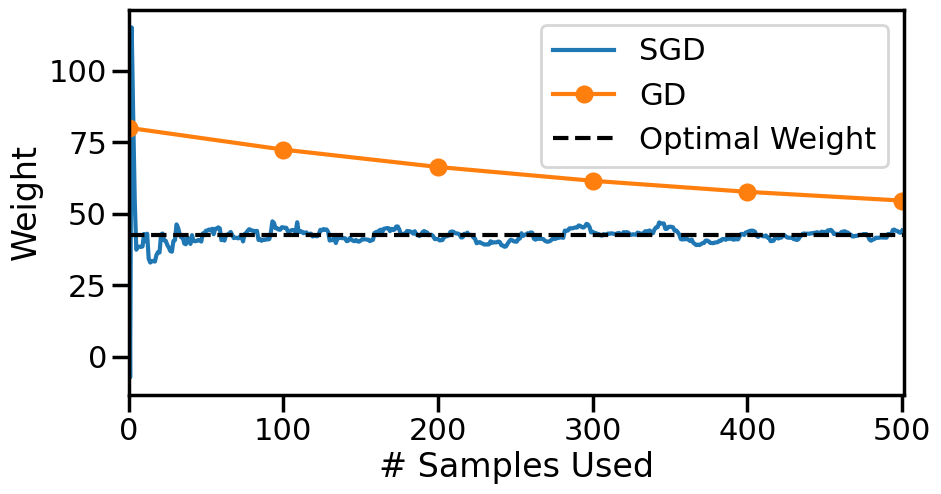

In [16]:
#################################
# Try Changing the below
wg = 80 # Initial guess at slope
alpha_i = 0.5  # Initial Step Size
#alpha = lambda n: alpha_i
#alpha = lambda n: alpha_i/n
alpha = lambda n: alpha_i/np.sqrt(n)
num_passes = 5  # Number of times we pass through the data
shuffle_after_pass = True  # Whether to shuffle the data
##########################
# What do you find?

N = len(y)
weights = np.zeros(N*num_passes+1)
k=0
weights[k] = wg  # Set the initial weight
print('Initial weight: ',weights[0])

index = list(range(N))
for n in range(num_passes):
    if shuffle_after_pass:
        np.random.shuffle(index)
    for i in index:
        k+=1
        xi = X[i,0]
        yi = y[i]
        weights[k] = weights[k-1] - alpha(k)*sgd_dloss(weights[k-1],yi,xi)
print('Final Weight from SGD: {:.2f}'.format(weights[-1]))
print("Compared to {:.2f} (Normal Equations)".format(wn))

plt.figure(figsize=(10,5))
# Plot SGD Weights
plt.plot(range(len(weights)), weights,
         marker=None,
         label = 'SGD')
# Plot Grad. Descent Weights
plt.plot(np.array(range(len(gd_weights)))*len(index),
         gd_weights,
         marker='o',
         label = 'GD')
# Plot True Answer
plt.hlines(wn, 0, len(weights), 
           label = "Optimal Weight", 
           color='k', linestyle="--")
plt.xlabel('# Samples Used')
plt.ylabel('Weight')
#plt.ylim([30,55])
plt.xlim([0,len(weights)])
plt.legend()
plt.show()

While Gradient Descent looks much better than SGD here, let's now scale the axis by the number of model evaluations needed:

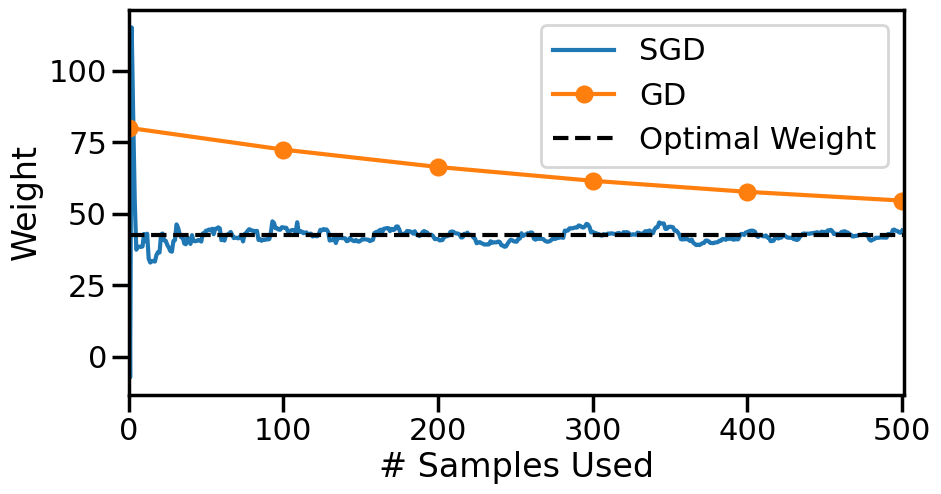

In [17]:
plt.figure(figsize=(10,5))
plt.plot(range(len(weights)), weights,
         label = 'SGD')
plt.plot(np.array(range(len(gd_weights)))*len(index),
         gd_weights,
         marker='o',
         label = 'GD')
plt.hlines(wn, 0, len(weights), 
           label = "Optimal Weight", 
           color='k', linestyle="--")
#plt.ylim([35,50])
plt.xlim([0,len(weights)])
plt.xlabel('# Samples Used')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [18]:
np.array(range(len(gd_weights)))*len(index)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])

## Existing Implementations
SGD is a fairly simple and popular technique for solving many problems where you can easily express the derivatives of those functions. For certain types of loss function (like the square error/L2 norm we discussed above), many folks have written optimized libraries for just that purpose, such as Scikit-Learn's [SGD functions](http://scikit-learn.org/stable/modules/sgd.html) including [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor).

For reference, the SGD Regressor in ScikitLearn uses an update rule similar to:
$$
\eta^{(t)} = \frac{eta_0}{t^{power_t}}
$$

In [19]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss = 'squared_error',
                   eta0 = 0.01,  # Initial Learning rate/step size
                   power_t = 0.25, # how quickly sould eta decay?
                   max_iter = 100,  # Max # of passes to do over the data?
                   tol = 1e-3,     # Tolerance for change in loss
                   fit_intercept=False # Not worrying about b term in w*x+b
                  )
# Here eta = eta0/(t^power_t) where t is the iteration
X = np.asarray(X)
y = np.array(y).reshape(len(y),) # Reshape y so that scikit doesn't complain
sgd.fit(X,y)
print('Final Weight from SKLearn SGD: {:.2f}'.format(sgd.coef_[0]))
print("Compared to {:.2f} (Normal Equations)".format(wn))

Final Weight from SKLearn SGD: 42.56
Compared to 42.57 (Normal Equations)


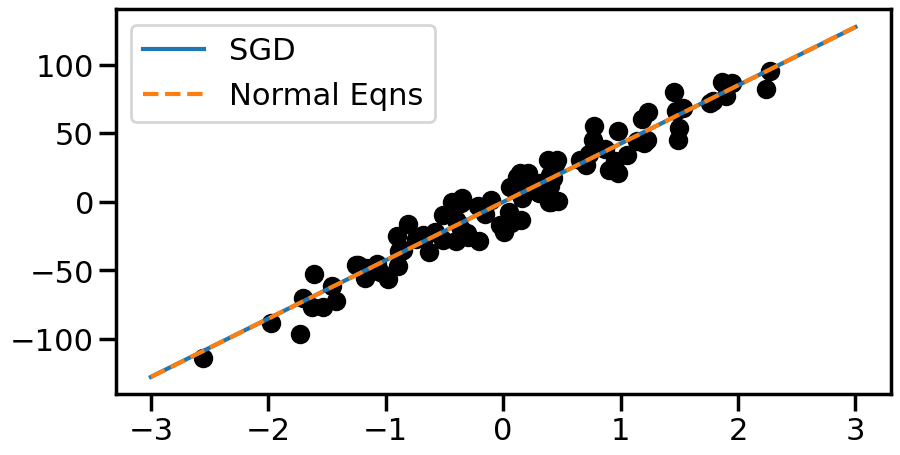

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(np.asarray(X).ravel(),
            np.asarray(y).ravel(),
            color='k'
           )
#plt.scatter(X,y)
Xp = [[-3],[3]]
plt.plot(Xp,sgd.predict(Xp),label='SGD')
plt.plot([-3,3],[-3*wn, 3*wn],
         label='Normal Eqns',
         linestyle='--' )
plt.legend()
plt.show()

## Advanced Techniques
There are a variety of more advanced SGD techniques, most of which involve one or more of the following tricks:
1. Using "acceleration" procedures that leverage "momentum" of some type. You can read more about this phenomenon at: ["Why Momentum Really Works"](https://distill.pub/2017/momentum/)
2. "Batching" the SGD updates: that is, taking steps that are considering $N>n>1$ in size (e.g., averaging the gradients of, say, 5 data points before taking a step). This can help stablize gradients and improve convergence.
3. "Normalizing" the gradient updates: that is, re-scaling the gradient updates at each step to achieve better convergence. This is commonly used in Neural Networks for things like [Batch Normalization (Wikipedia)](https://en.wikipedia.org/wiki/Batch_normalization) (or, for a more advanced introduction, you can read the NeurIPS paper [Understanding Batch Normalization](https://papers.nips.cc/paper/7996-understanding-batch-normalization.pdf)).